# Analyse des données de FAO

## Installation du kernel SAS

In [1]:
pip install saspy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sas_kernel

Note: you may need to restart the kernel to use updated packages.


Une fois les deux commandes lancées, il faut enregistrer et quitter (et restart the kernel ?). Mais quand on revient on a bien SAS proposé dans les kernel (Kernel > Change kernel).

In [ ]:
%load_ext saspy.ipython
%%SAS
proc import out=table
datafile='module2/exo4/cdu_ba_pied.csv' 
dbms=dlm replace;
delimiter=';'; /*csv*/
getnames=yes; /*la première ligne donne les noms des variables*/
guessingrows=max; /*utilisation du max de lignes pour déterminer le type de variable (numérique / nombre de caractères, etc*/
run;


[<class 'saspy.sasexceptions.SASIOConnectionTerminated'>, SASIOConnectionTerminated(<class 'Exception'>,), <traceback object at 0x7fe1cf696688>]


ça ne marche pas parce qu'il faut réussir à connecter Jupyter avec SAS (pour la licence je pense) donc j'abandonne (pas sûre que ça vale le coût de passer du temps dessus, mais à voir) et je reste en R.

## Retour au kernel R

Je change le Kernel (dans Kernel > Change Kernel > R).

In [6]:
library(readr)

In [21]:
data1 <- read_csv('/home/3f624f2cce5b76d09dcee501242941ad/
mooc-rr/module2/exo4/cdu_ba_pied.csv')
head(data1)

/home/3f624f2cce5b76d09dcee501242941ad/
1 mooc-rr/module2/exo4/cdu_ba_pied.csv

Bon j'arrive pas à importer le fichier ça me soule. J'essaie avec les conseils de ChatGTP.

In [31]:
# Specify the URL of the raw CSV file on GitLab
url <- 'https://app-learninglab.inria.fr/moocrr/gitlab/3f624f2cce5b76d09dcee501242941ad/mooc-rr/raw/master/module2/exo4/cdu_ba_pied.csv'

# Define a temporary file to store the downloaded CSV
temp_file <- tempfile()

# Download the file from the URL
download.file(url, temp_file)

# Read the CSV file into a data frame
data <- read.csv(temp_file)

# Display the first few rows of the data
head(data)

Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 12 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 12 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string

“input string 12 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 12 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 12 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 12 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 12 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 12 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 12 is invalid in this locale”War

code_fao  Produit                        Code_Domaine
1 01199.02  C\xe9r\xe9ales m\xe9lang\xe9es SCL         
2 01199.90  Cer\xe9ales n.a.c.             SCL         
3 01241.01  Haricots verts                 SCL         
4 01241.90  Autres haricots frais          SCL         
5 01253.01  Oignons                         echalotes  
6 16600.565 2014-2015                                  
  Domaine                                                Production_Source
1 Compte Disponibilit\xe9s et Utilisations (CDU) (2010-) Chiffre officiel 
2 Compte Disponibilit\xe9s et Utilisations (CDU) (2010-) Chiffre officiel 
3 Compte Disponibilit\xe9s et Utilisations (CDU) (2010-)                  
4 Compte Disponibilit\xe9s et Utilisations (CDU) (2010-) Chiffre officiel 
5  frais                                                 SCL              
6                                                                         
  Exportations_Source                                    Importations_Source
1                                                                           
2 Chiffre officiel                                       Chiffre officiel   
3                                                                           
4 Chiffre officiel                                       Chiffre officiel   
5 Compte Disponibilit\xe9s et Utilisations (CDU) (2010-)                    
6                                                                           
  Production       Importations     Exportations Code_annee_pie
1 458850                                         2019-2021     
2 257583.33333     8705.55          75722.893333 2019-2021     
3                                                2019-2021     
4 369030           50019.883333     115180.46    2019-2021     
5 Chiffre officiel Chiffre officiel              2573.4766667  
6                                                              
  Dispo_alim_Source Dispo_alim Code_annee_dispo 
1                              2014-2015        
2 Valeur estim\xe9e 14218.27   2014-2015        
3 Valeur estim\xe9e 273285.2   2014-2015        
4 Valeur estim\xe9e 0          2014-2015        
5 29585.933333      2019-2021  Valeur estim\xe9e
6

Il faut bien un fichier csv avec des délimitateurs en "," et pas ";" comme je peux avoir...
ça affiche plusieurs messages d'erreurs, jsp pourquoi mais j'arrive quand même à avoir un tableau donc on va faire avec.

Par contre comme j'ai modifié les délimitateurs les données ne ressemblent à rien (décalage) donc je change de fichier : impact env des groupes alimentaires.

# Analyse des données d'impact env des groupes alimentaires
## Importation des données

In [32]:
# Specify the URL of the raw CSV file on GitLab
url <- 'https://app-learninglab.inria.fr/moocrr/gitlab/3f624f2cce5b76d09dcee501242941ad/mooc-rr/raw/master/module2/exo4/impact_gpe_v8.csv'

# Define a temporary file to store the downloaded CSV
temp_file <- tempfile()

# Download the file from the URL
download.file(url, temp_file)

# Read the CSV file into a data frame
data <- read.csv(temp_file)

# Display the first few rows of the data
head(data)

GROUPE_CODE X_FREQ_ Score_unique_EF_Mean Score_unique_EF_StdDev
1 01_01        40     0.1690671            0.08691235            
2 01_02         7     0.1728571            0.10703804            
3 02_00        37     0.5100868            0.15954683            
4 03_00       148     0.3757590            0.15986727            
5 04_01        19     0.3820526            0.51322298            
6 04_02        39     0.2280956            0.06366713            
  Changement_climatique_Mean Changement_climatique_StdDev
1 1.102390                   0.4075877                   
2 1.100000                   0.4086155                   
3 3.135058                   0.8759679                   
4 3.452280                   1.9798605                   
5 3.685033                   4.9710141                   
6 2.060701                   0.8268534                   
  Appauvrissement_couche_oz_Mean Appauvrissement_couche__StdDev
1 0.09824716                     0.03426206                    
2 0.08857143                     0.01864454                    
3 0.17721972                     0.03010228                    
4 0.14812877                     0.05557163                    
5 0.23524215                     0.27525562                    
6 0.28485105                     0.31727765                    
  Rayonnements_ionisants_Mean Rayonnements_ionisants_StdDev ⋯
1 0.5267681                   0.12902244                    ⋯
2 0.5014286                   0.02544836                    ⋯
3 0.6426515                   0.08304114                    ⋯
4 0.6703031                   0.08027937                    ⋯
5 0.2283650                   0.06213468                    ⋯
6 0.6158955                   0.12766589                    ⋯
  ecotoxicite_ecosystemes_a_Mean ecotoxicite_ecosystemes_StdDev
1  90.88954                       67.41254                     
2  75.45571                       30.04057                     
3 177.46081                       72.01405                     
4 204.61011                      128.26250                     
5 301.07316                      537.94551                     
6 107.21770                       55.19385                     
  Utilisation_sol_Mean Utilisation_sol_StdDev epuisement_des_ressources_Mean
1 31.40162             74.027014               2.2063072                    
2 14.73429              5.741321               4.3042857                    
3 63.20811             67.605597              18.8161715                    
4 48.02076             37.685328               3.2385071                    
5 26.02446             45.525157               0.4947791                    
6 30.41174             30.502889               0.9428732                    
  epuisement_des_ressourc_StdDev epuisement_ressources_ene_Mean
1  5.271515                      20.05869                      
2 10.111060                      19.27714                      
3 13.198296                      30.80388                      
4  4.698552                      29.00469                      
5  0.194756                      15.01469                      
6  0.571074                      23.07049                      
  epuisement_ressources_e_StdDev epuisement_ressources_min_Mean
1 4.688664                        5.768970                     
2 3.513985                        4.832857                     
3 5.129368                       10.623857                     
4 6.830369                       10.367855                     
5 6.848735                        7.092651                     
6 3.782505                       12.374241                     
  epuisement_ressources_m_StdDev
1 3.227286                      
2 1.681881                      
3 1.711190                      
4 6.006572                      
5 7.256771                      
6 7.419407

Là j'ai aucun message d'erreur donc j'ai bien fait de changer de fichier.

## Analyse
### Statistiques
On s'intéresse d'abord à toutes les variables

In [37]:
str(data)

'data.frame':	38 obs. of  36 variables:
 $ GROUPE_CODE                   : Factor w/ 38 levels "01_01","01_02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ X_FREQ_                       : int  40 7 37 148 19 39 105 47 18 86 ...
 $ Score_unique_EF_Mean          : num  0.169 0.173 0.51 0.376 0.382 ...
 $ Score_unique_EF_StdDev        : num  0.0869 0.107 0.1595 0.1599 0.5132 ...
 $ Changement_climatique_Mean    : num  1.1 1.1 3.14 3.45 3.69 ...
 $ Changement_climatique_StdDev  : num  0.408 0.409 0.876 1.98 4.971 ...
 $ Appauvrissement_couche_oz_Mean: num  0.0982 0.0886 0.1772 0.1481 0.2352 ...
 $ Appauvrissement_couche__StdDev: num  0.0343 0.0186 0.0301 0.0556 0.2753 ...
 $ Rayonnements_ionisants_Mean   : num  0.527 0.501 0.643 0.67 0.228 ...
 $ Rayonnements_ionisants_StdDev : num  0.129 0.0254 0.083 0.0803 0.0621 ...
 $ Formation_photochimique_o_Mean: num  3.37 3.05 8.37 7.58 7.77 ...
 $ Formation_photochimique_StdDev: num  1.52 1.04 2.06 3.86 11.2 ...
 $ Particules_Mean               : num  0.099 0.

ça donne les infos globales sur la bdd.

In [33]:
summary(data)

  GROUPE_CODE    X_FREQ_       Score_unique_EF_Mean Score_unique_EF_StdDev
 01_01  : 1   Min.   :  2.00   Min.   :0.0400       Min.   :0.00000       
 01_02  : 1   1st Qu.: 18.00   1st Qu.:0.1728       1st Qu.:0.08557       
 02_00  : 1   Median : 33.50   Median :0.2484       Median :0.16801       
 03_00  : 1   Mean   : 46.63   Mean   :0.5270       Mean   :0.30424       
 04_01  : 1   3rd Qu.: 57.50   3rd Qu.:0.5825       3rd Qu.:0.31105       
 04_02  : 1   Max.   :158.00   Max.   :3.1376       Max.   :1.49730       
 (Other):32                                                               
 Changement_climatique_Mean Changement_climatique_StdDev
 Min.   : 0.270             Min.   : 0.0000             
 1st Qu.: 1.101             1st Qu.: 0.4813             
 Median : 2.068             Median : 0.9744             
 Mean   : 4.020             Mean   : 2.2313             
 3rd Qu.: 3.697             3rd Qu.: 2.3812             
 Max.   :29.629             Max.   :13.8123             
 

Comme il y a beaucoup trop de variables, on va s'intéresser seulement à 2 : score unique et GES.

In [35]:
summary(data$Score_unique_EF_Mean)
summary(data$Changement_climatique_Mean)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0400  0.1728  0.2484  0.5270  0.5825  3.1376 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.270   1.101   2.068   4.020   3.697  29.629 

Bon comme je n'ai plus toutes mes connaissances en R, on va passer aux graphiques.

### Graphiques

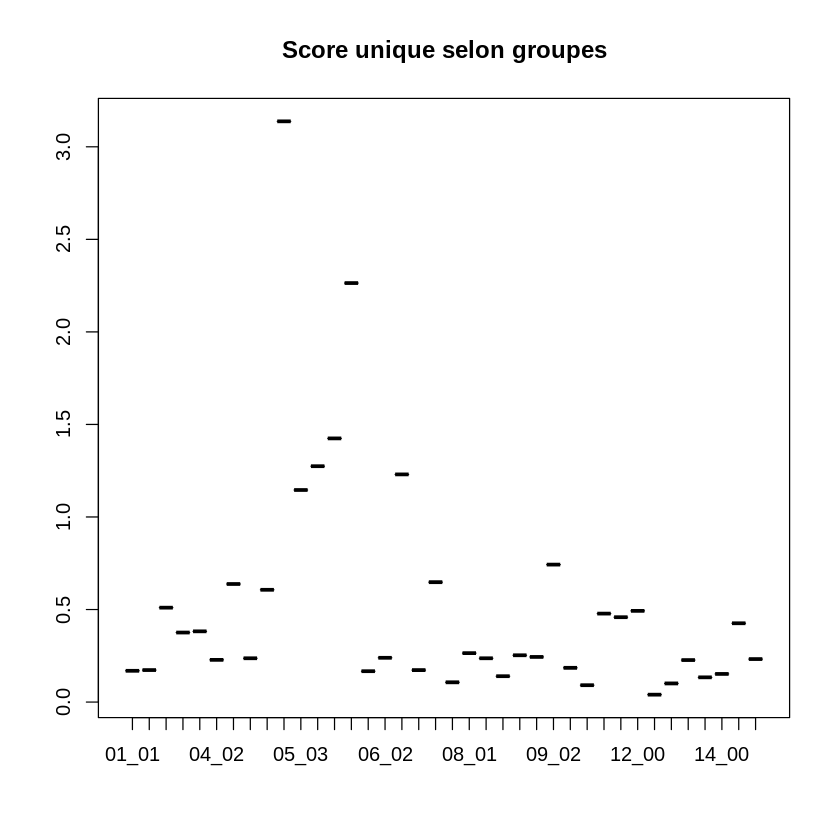

In [45]:
plot(x=data$GROUPE_CODE, y=data$Score_unique_EF_Mean, main = "Score unique selon groupes")

C'est pas mal, j'arrive pas à changer les tirets en point (même avec pch) mais c'est pas grave ça semble quand même fonctionner. 
Je fais la même chose avec les GES.

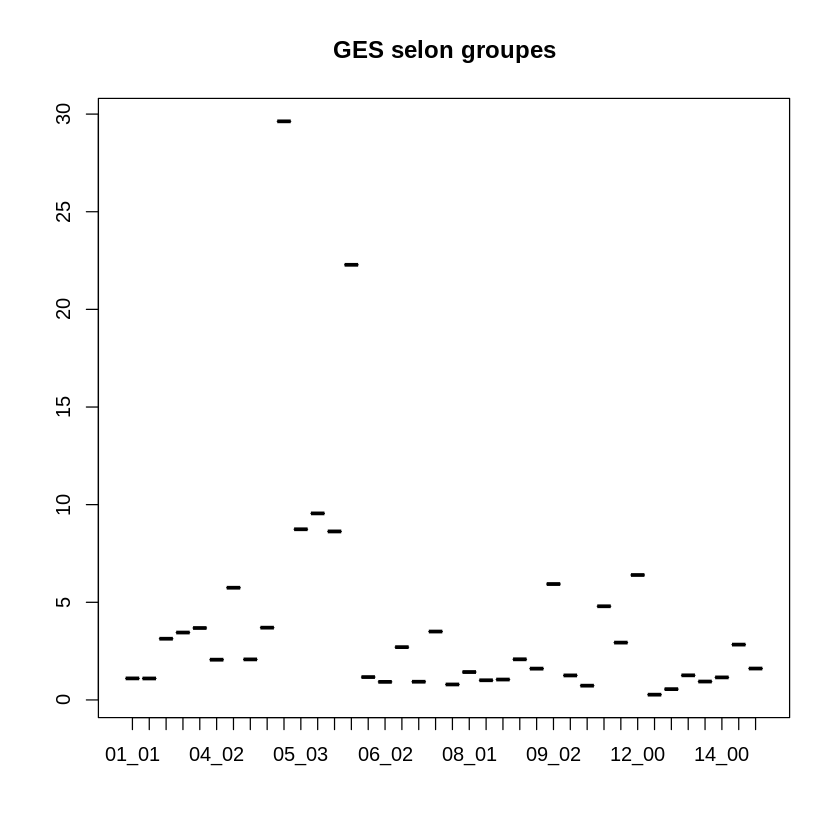

In [46]:
plot(x=data$GROUPE_CODE, y=data$Changement_climatique_Mean, main = "GES selon groupes")

Et voila, on dit que c'est très bien pour l'instant :)